Success
üöÄ Starting  correlation analysis...
üìÖ Analyzing 30 days: 2025-08-05 to 2025-09-04
üìä Found 2991 raw alarms

üìà Alarm Processing Results:
  ‚Ä¢ Raw alarms: 2991
  ‚Ä¢ Expanded alarms: 6762
  ‚Ä¢ Multi-site expansions: 4180

üìä Event Types After Expansion:
  ‚Ä¢ high packet loss on multiple links: 2627
  ‚Ä¢ ASN path anomalies: 2004
  ‚Ä¢ high delay from/to multiple sites: 1553
  ‚Ä¢ high one-way delay: 329
  ‚Ä¢ high packet loss: 149
  ‚Ä¢ bandwidth decreased: 100

üõ£Ô∏è ASN/Path alarms found: 2004
  ASN event types: ['ASN path anomalies']

üîó DAILY CO-OCCURRENCE ANALYSIS
üìÖ Analyzing 61 unique dates for co-occurrences...
  üéØ 2025-08-07: 17 ASN + 246 performance alarms
  üéØ 2025-08-08: 1450 ASN + 67 performance alarms
  üéØ 2025-08-09: 27 ASN + 105 performance alarms
  üéØ 2025-08-12: 6 ASN + 217 performance alarms
  üéØ 2025-08-13: 29 ASN + 74 performance alarms
  üéØ 2025-08-14: 151 ASN + 36 performance alarms
  üéØ 2025-08-15: 21 ASN + 91 performan

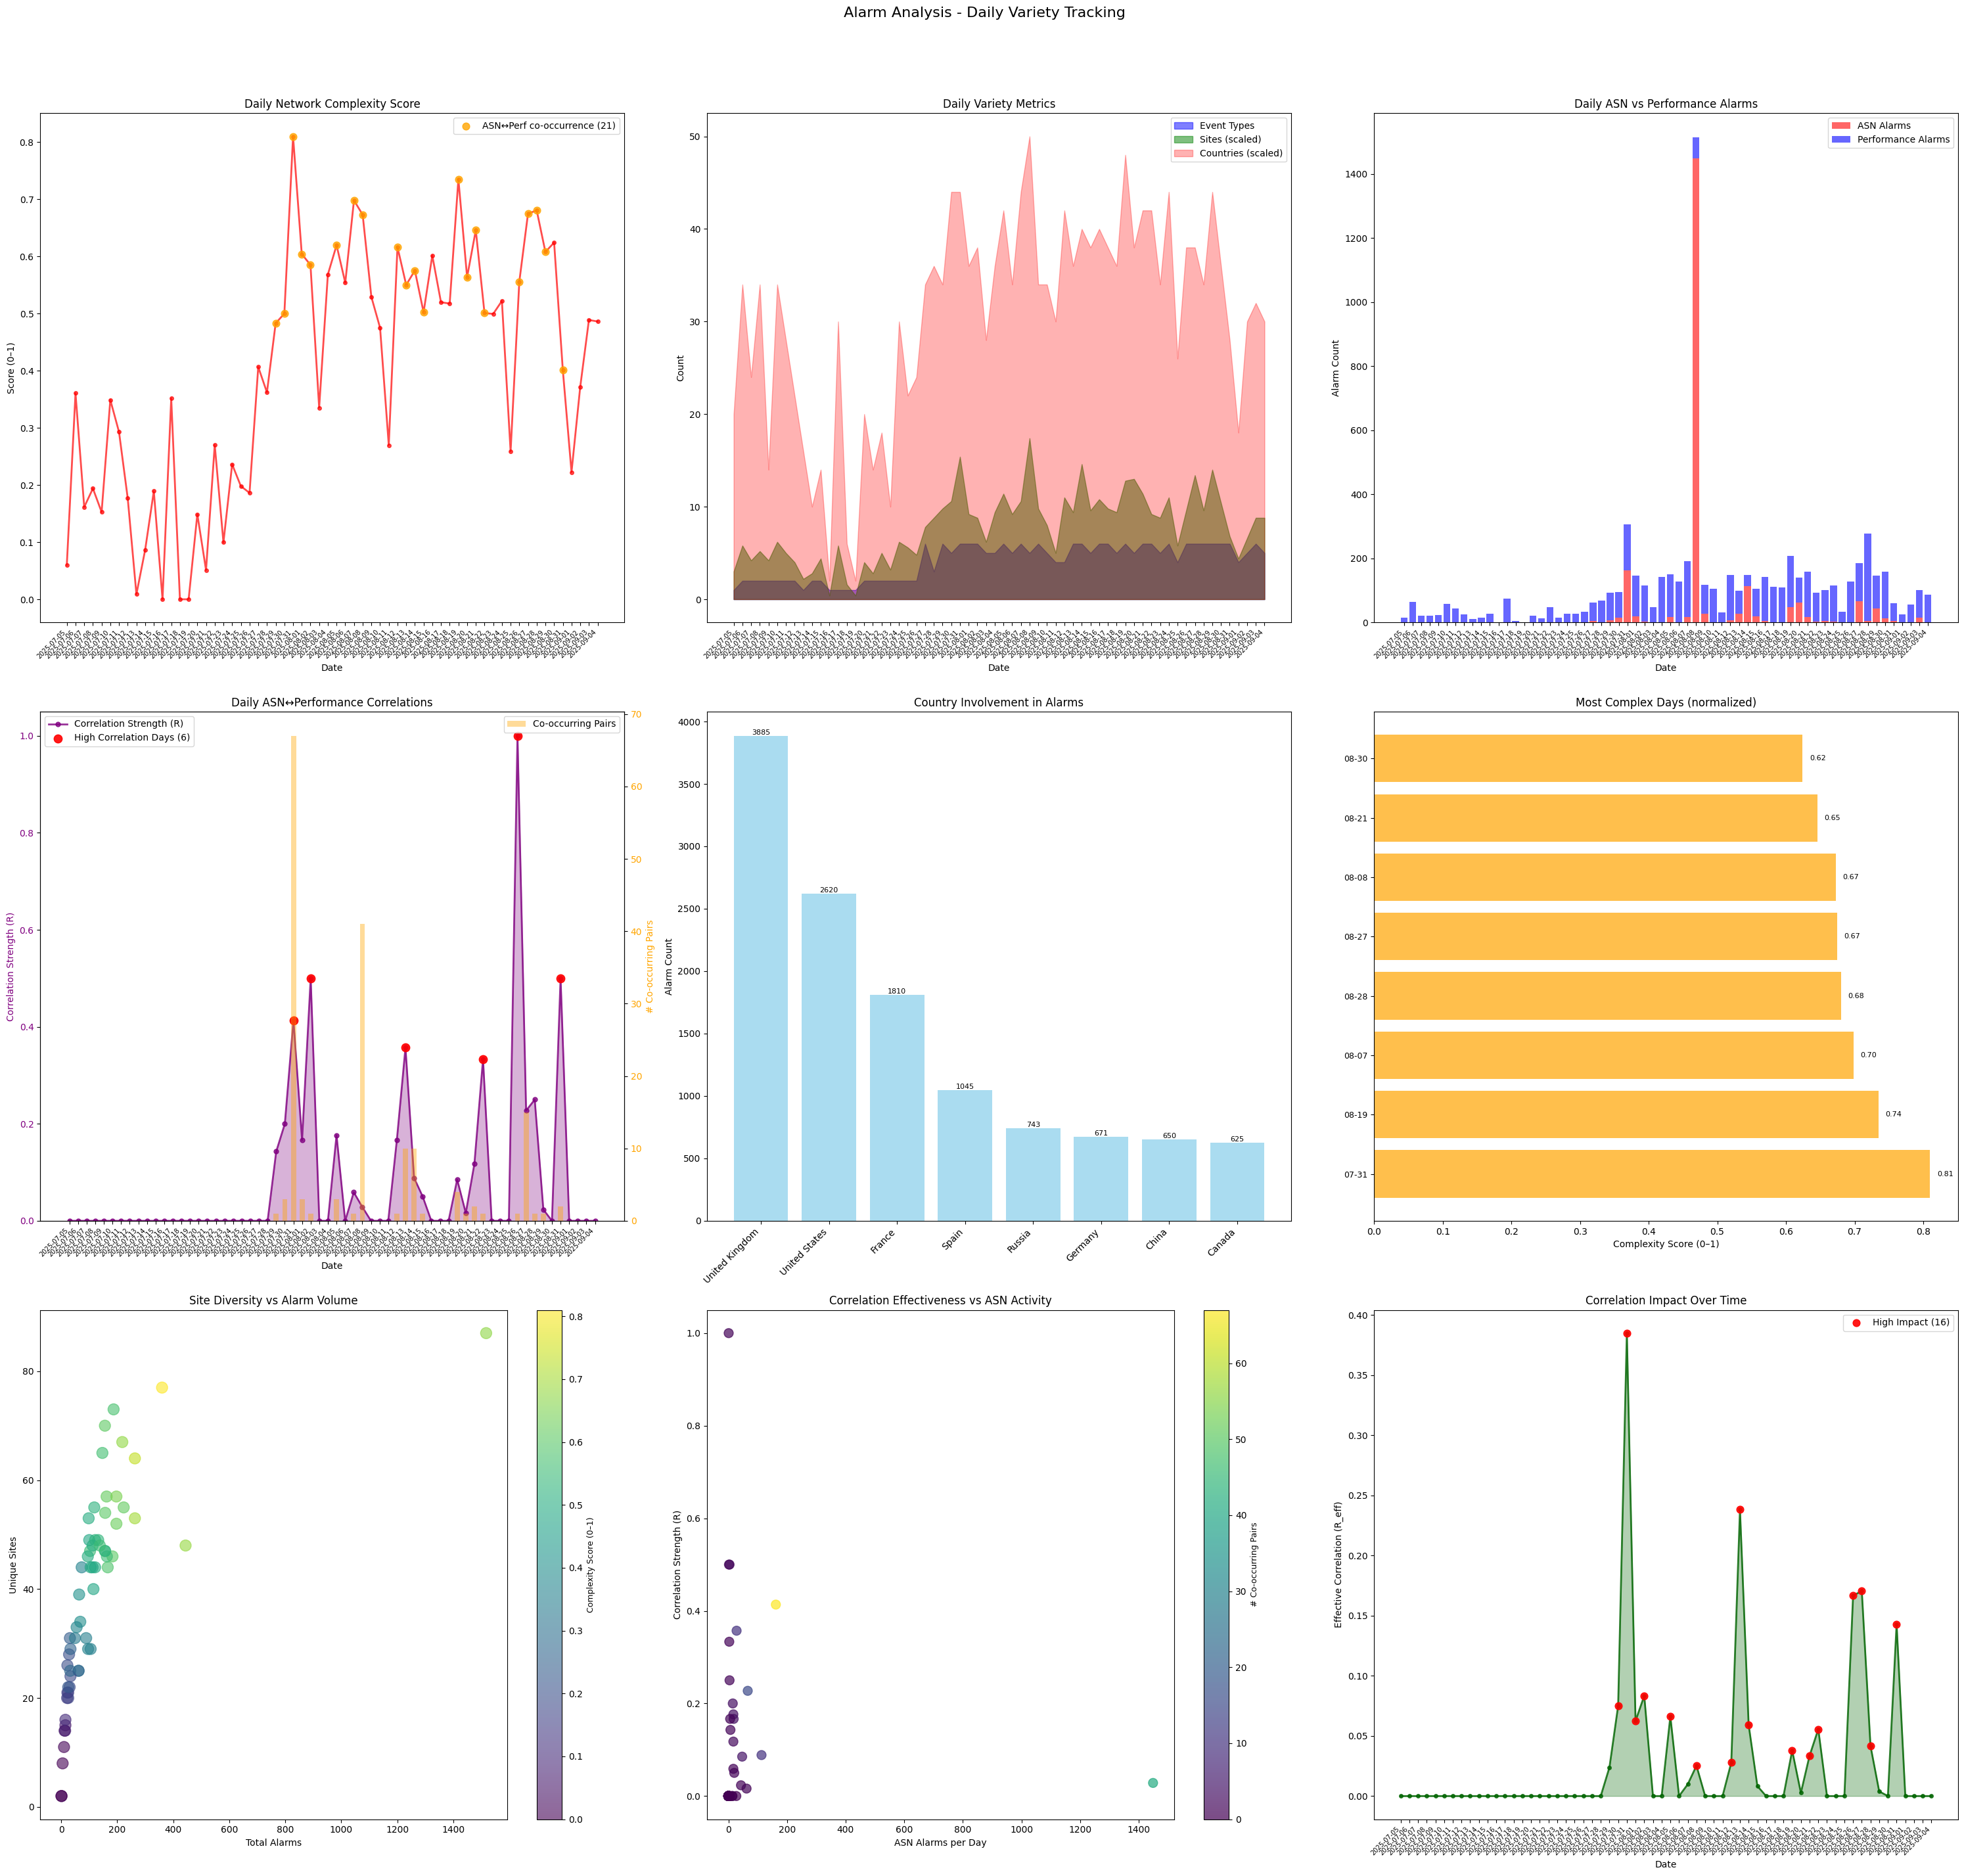


üìä COMPLEXITY SCORE DESCRIPTION


INTERPRETATION:
‚Ä¢ 0.0-0.3: Low complexity (routine network operations?)
‚Ä¢ 0.3-0.6: Moderate complexity (localized issues)
‚Ä¢ 0.6-0.8: High complexity (widespread instability)
‚Ä¢ 0.8-1.0: Critical complexity (possibly major network incidents)

Higher scores indicate more complex, widespread network instability with diverse
alarm types affecting multiple sites and countries.
    


In [1]:
from daily_alarms_cooccurrence import plot_correlation_heatmaps, analyze_alarm_correlations, corr_analysis

analysis_results = analyze_alarm_correlations(days_back=40)
daily_analysis_results = corr_analysis(analysis_results)


   üìÇ Loaded 112 sites from cache: site_countries_cache.json
   üîç Looking up 87 unique sites...
   ‚úÖ Matched 87/87 sites to countries
   üåê International connections: 1498/1517 (98.7%)
   üîó Top international routes:
      ‚Ä¢ United Kingdom ‚Üí United States: 71
      ‚Ä¢ United States ‚Üí United Kingdom: 60
      ‚Ä¢ United Kingdom ‚Üí France: 56
      ‚Ä¢ France ‚Üí United States: 35
      ‚Ä¢ France ‚Üí United Kingdom: 34


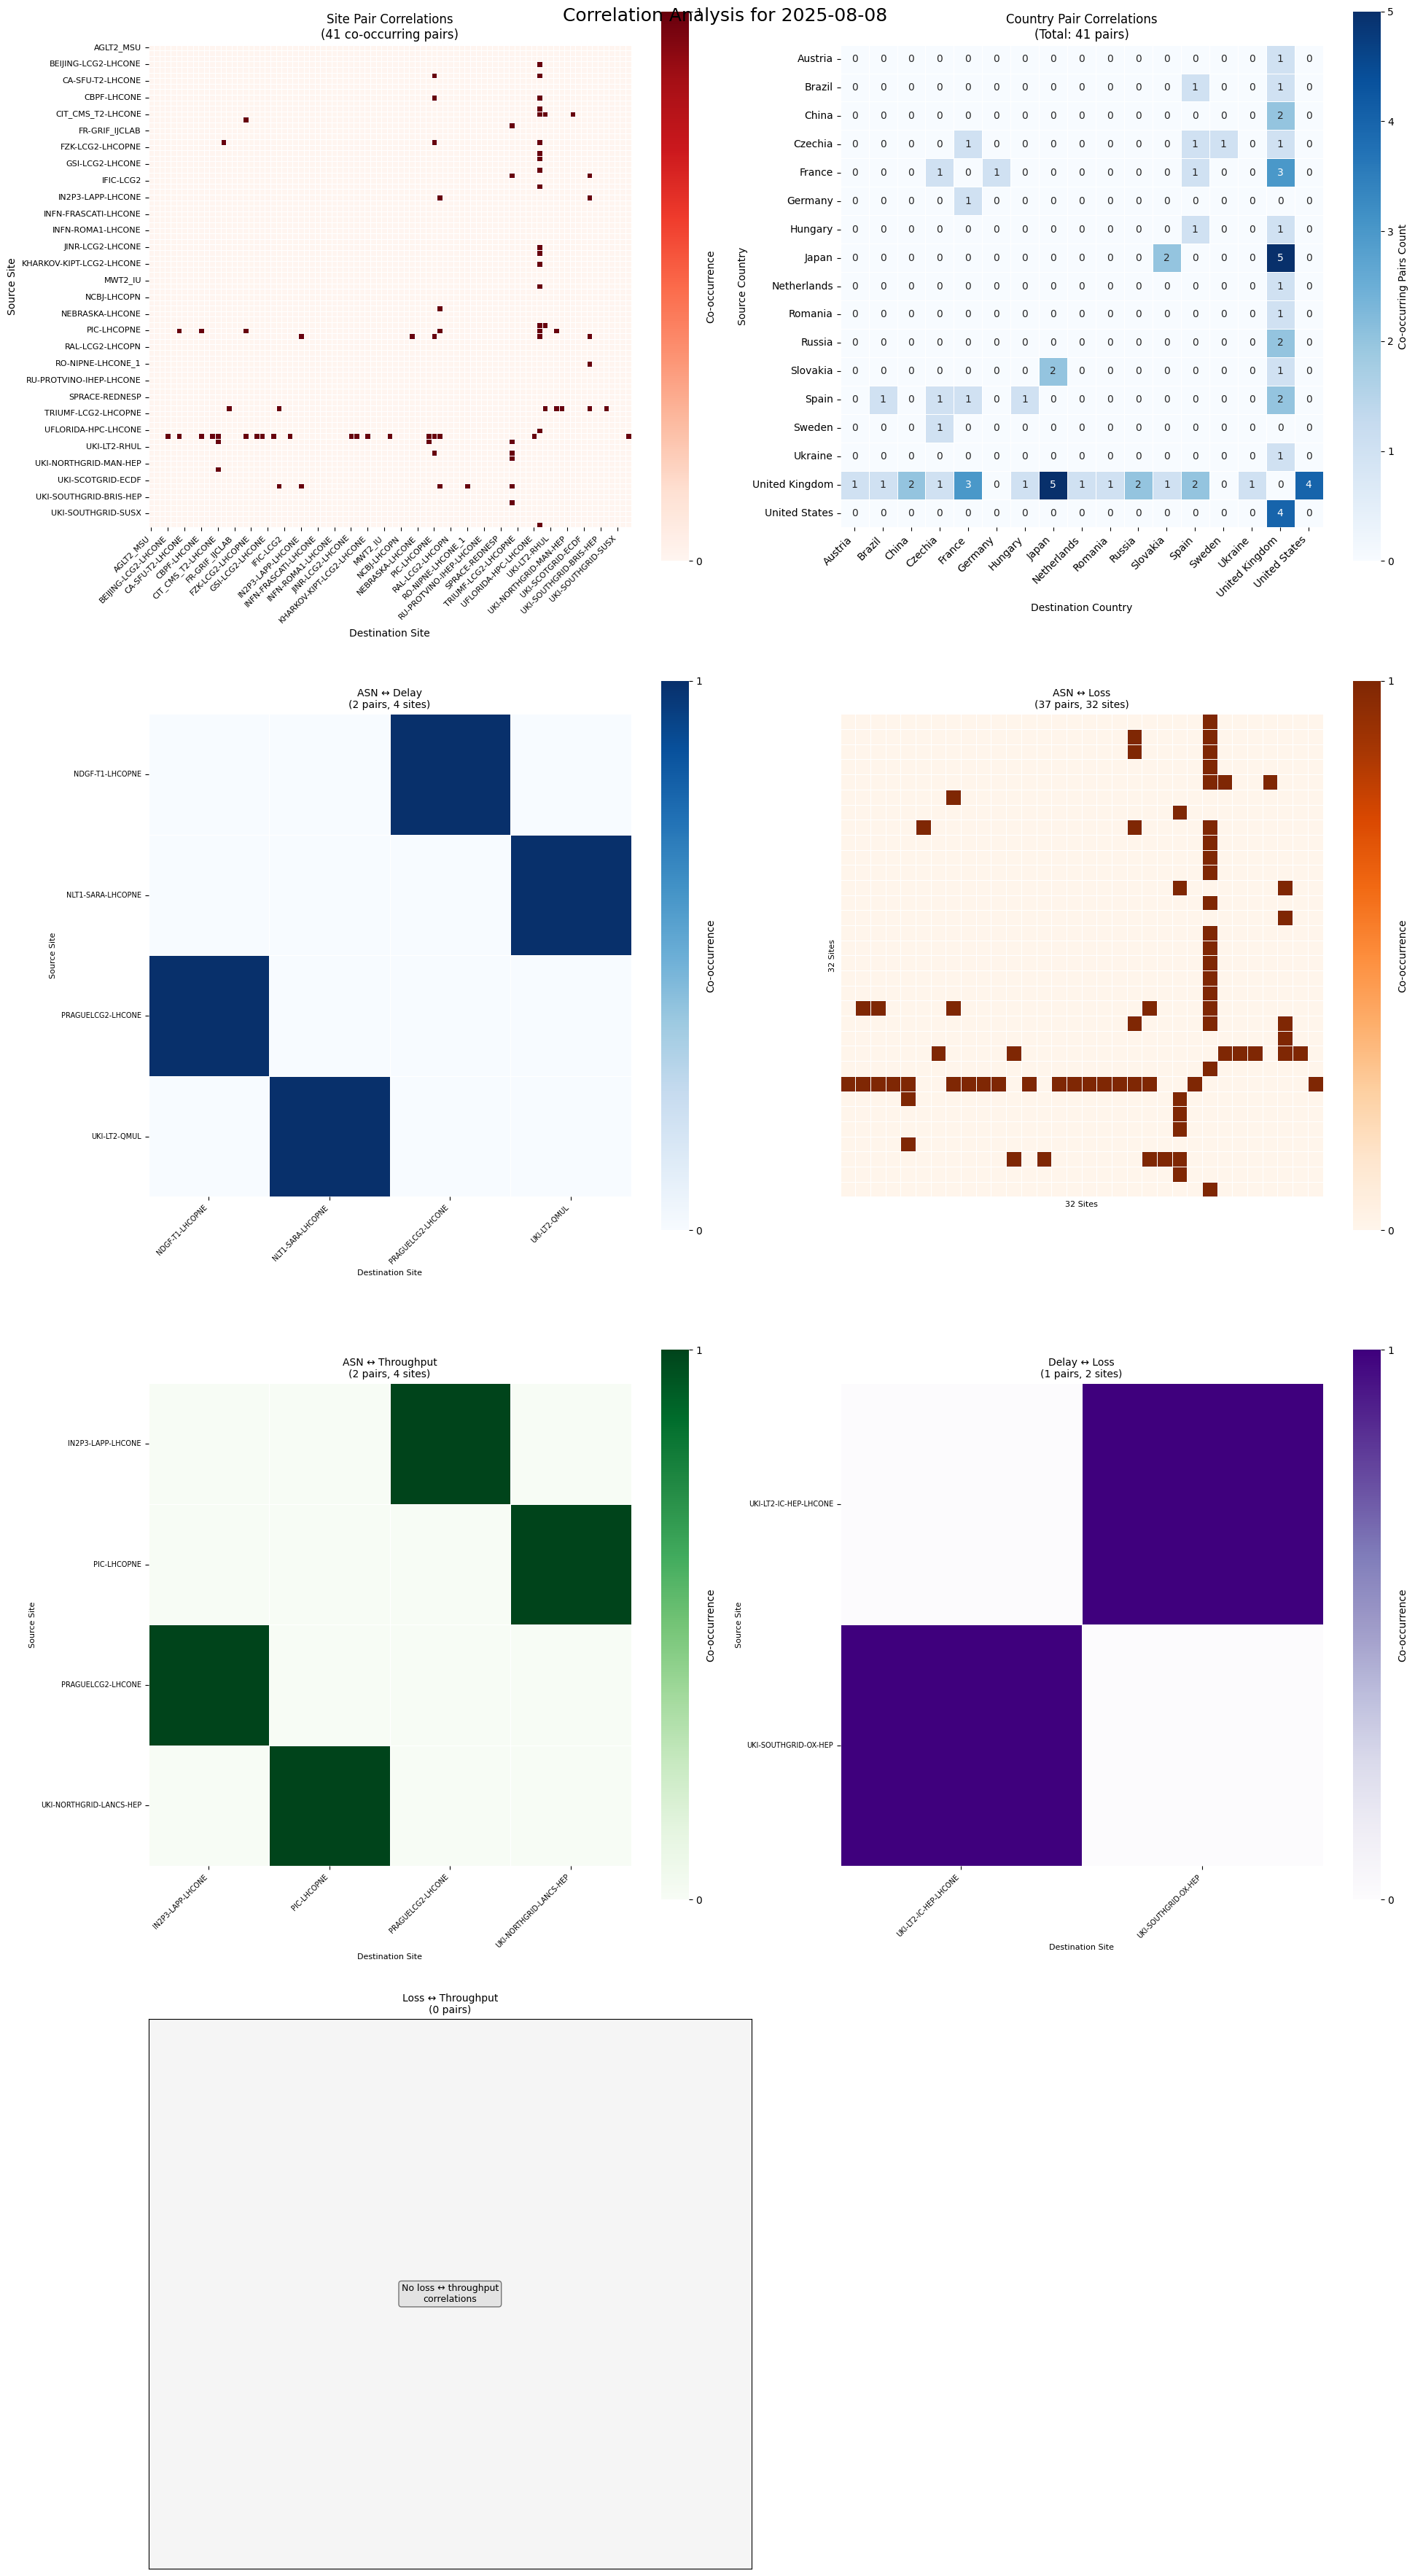


üìä 2025-08-08 Correlation Summary:
  ‚Ä¢ Total site pairs analyzed: 1472
  ‚Ä¢ Co-occurring site pairs: 41
  ‚Ä¢ Correlation strength (R): 0.028
  ‚Ä¢ Sites involved in correlations: 33
  ‚Ä¢ Total country-level co-occurring pairs: 35

üîç Specific Correlation Breakdowns:
  ‚Ä¢ ASN ‚Üî Delay: 2 co-occurring pairs
  ‚Ä¢ ASN ‚Üî Loss: 37 co-occurring pairs
  ‚Ä¢ ASN ‚Üî Throughput: 2 co-occurring pairs
  ‚Ä¢ Delay ‚Üî Loss: 1 co-occurring pairs
  ‚Ä¢ Loss ‚Üî Throughput: 0 co-occurring pairs


{'site_overall':                             AGLT2_MSU  AGLT2_UM  BEGRID-ULB-VUB  \
 AGLT2_MSU                           0         0               0   
 AGLT2_UM                            0         0               0   
 BEGRID-ULB-VUB                      0         0               0   
 BEIJING-LCG2-LHCONE                 0         0               0   
 BNL-ATLAS-LHCOPNE                   0         0               0   
 ...                               ...       ...             ...   
 UKI-SOUTHGRID-OX-HEP                0         0               0   
 UKI-SOUTHGRID-RALPP-LHCONE          0         0               0   
 UKI-SOUTHGRID-SUSX                  0         0               0   
 UTA_SWT2-LHCONE                     0         0               0   
 VANDERBILT                          0         0               0   
 
                             BEIJING-LCG2-LHCONE  BNL-ATLAS-LHCOPNE  BUDAPEST  \
 AGLT2_MSU                                     0                  0         0   
 AGL

In [2]:
alarms_df = analysis_results['alarms_df']
plot_correlation_heatmaps(alarms_df, "2025-08-08")
# plot_correlation_heatmaps(alarms_df, "2025-07-31", figsize=(24, 10))
# plot_correlation_heatmaps(alarms_df, "2025-07-25", figsize=(24, 10))

#### Get the raw data + baselines for the pairs with routing+performance alarms

In [3]:
from focused_data_collector import main_from_cooccurrence_windows, main_with_pairs


cooccurring_pairs = analysis_results['cooccurring_pairs_by_date']

# Get pairs for a specific date
focus_pairs = cooccurring_pairs['2025-08-08']['pairs']

# Include reverse pairs + throughput filling  
datasets_bidirectional = main_with_pairs(
    focus_pairs,
    '2025-08-06T03:00:00.000Z', '2025-08-08T03:00:00.000Z',
    include_reverse_pairs=True  # Doubles queries!
)

# Access the focused datasets
throughput_df = datasets_bidirectional['throughput_df']  # Throughput + baselines for focus pairs
owd_df = datasets_bidirectional['owd_df']               # 10-min OWD + baselines for focus pairs  
loss_df = datasets_bidirectional['loss_df']             # 10-min loss data for focus pairs
trace_df = datasets_bidirectional['trace_df']           # Raw traceroutes for focus pairs
performance_df = datasets_bidirectional['performance_df'] # Unified performance dataset


Success
üîÑ Added 41 reverse pairs (total: 82)
üéØ Focused data collector initialized
   Analysis period: 2025-08-06T03:00:00.000Z to 2025-08-08T03:00:00.000Z
   Focus pairs: 82 site pairs (bidirectional)
   Baseline lookback: 21 days
   ‚úÖ Mapped 82 pairs to database site names
üéØ FOCUSED NETWORK DATA COLLECTION

üìä COLLECTING DATA FOR 82 FOCUS PAIRS

üìä Collecting throughput data for 82 focus pairs...
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí Found 1 measurements
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí No data
      ‚Üí No data
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí No data
      ‚Üí No data
      ‚Üí Found 2 measurements
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí No data
      ‚Üí Found 1 measurements
      ‚Üí Found 1 meas

In [7]:
from graph_based_anomaly_detector import GraphBasedAnomalyDetector
import pandas as pd
baseline_window_hours=24
embedding_dim=32
min_edge_weight=2
trace_df_sorted = trace_df.sort_values('dt').reset_index(drop=True)

# Split into baseline and analysis windows
baseline_end_time = (trace_df_sorted['dt'].min() + 
                    pd.Timedelta(hours=baseline_window_hours))

baseline_traces = trace_df_sorted[trace_df_sorted['dt'] <= baseline_end_time]
analysis_traces = trace_df_sorted[trace_df_sorted['dt'] > baseline_end_time]

print(f"üìÖ Time windows:")
print(f"   ‚Ä¢ Baseline: {baseline_traces['dt'].min()} ‚Üí {baseline_traces['dt'].max()}")
print(f"   ‚Ä¢ Analysis: {analysis_traces['dt'].min()} ‚Üí {analysis_traces['dt'].max()}")
print(f"   ‚Ä¢ Baseline traces: {len(baseline_traces)}")
print(f"   ‚Ä¢ Analysis traces: {len(analysis_traces)}")

if len(baseline_traces) < 1000:
    print("   ‚ö†Ô∏è Insufficient baseline data for graph construction")

# The AD is done with Isolation forest
detector = GraphBasedAnomalyDetector(
    embedding_dim=embedding_dim,
    min_edge_weight=min_edge_weight
)

# Train on baseline data
training_stats = detector.train(baseline_traces)

# Detect anomalies in analysis window
if not analysis_traces.empty:
    analysis_results = detector.detect_anomalies(analysis_traces)
    
    # Summarize results by site pair
    anomaly_summary = (analysis_results.groupby(['src_site', 'dest_site'])
                        .agg({
                            'graph_is_anomaly': ['count', 'sum'],
                            'graph_anomaly_score': ['mean', 'min', 'std']
                        }).round(3))
    
    # Flatten column names
    anomaly_summary.columns = ['total_traces', 'anomalies', 
                                'mean_score', 'min_score', 'std_score']
    anomaly_summary['anomaly_rate'] = (anomaly_summary['anomalies'] / 
                                        anomaly_summary['total_traces'] * 100)
    anomaly_summary = anomaly_summary.round(3).sort_values('anomaly_rate', ascending=False)
    
    print(f"\nüìä Anomaly Summary by Site Pair:")
    print(anomaly_summary.head(10))
    
else:
    analysis_results = pd.DataFrame()
    anomaly_summary = pd.DataFrame()
    print("   ‚ö†Ô∏è No traces in analysis window")


detector.plot_asn_network(max_nodes=100)


üìÖ Time windows:
   ‚Ä¢ Baseline: 2025-08-06 03:00:06+00:00 ‚Üí 2025-08-07 03:00:06+00:00
   ‚Ä¢ Analysis: 2025-08-07 03:00:08+00:00 ‚Üí 2025-08-08 03:00:00+00:00
   ‚Ä¢ Baseline traces: 34088
   ‚Ä¢ Analysis traces: 34097
üöÄ Training graph-based anomaly detector on 34088 paths...
üï∏Ô∏è Building ASN co-occurrence graph from 34088 paths...
   üìä Processing 34 unique ASNs and 72 potential edges...
   ‚úÖ Graph construction complete:
      ‚Ä¢ ASN nodes: 34
      ‚Ä¢ Edges: 69
      ‚Ä¢ Density: 0.0615
      ‚Ä¢ Largest component: 34 nodes
üß† Training node2vec embeddings...


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50/50 [00:00<00:00, 416.17it/s]


   ‚úÖ Node2vec training complete:
      ‚Ä¢ Embedding dimension: 32
      ‚Ä¢ ASNs embedded: 34
üî¢ Generating path embeddings for 34088 paths...
   ‚úÖ Generated embeddings: (34088, 35)
ü§ñ Training Isolation Forest anomaly detector...
   ‚úÖ Training complete!
      ‚Ä¢ Graph nodes: 34
      ‚Ä¢ Graph edges: 69
      ‚Ä¢ Embedding dimension: 35
      ‚Ä¢ Baseline paths: 34088
üîç Detecting anomalies in 34097 paths...
üî¢ Generating path embeddings for 34097 paths...
   ‚úÖ Generated embeddings: (34097, 35)
   ‚úÖ Anomaly detection complete:
      ‚Ä¢ Paths analyzed: 34097
      ‚Ä¢ Anomalies detected: 5301 (15.5%)

üìä Anomaly Summary by Site Pair:
                                             total_traces  anomalies  \
src_site              dest_site                                        
CBPF-LHCONE           UKI-LT2-IC-HEP-LHCONE           253        253   
PIC-LHCOPNE           CBPF-LHCONE                     578        578   
CBPF-LHCONE           PIC-LHCOPNE              

(<Figure size 1200x1000 with 1 Axes>,
 <Axes: title={'center': 'ASN Co-occurrence Network\\n34 nodes, 69 edges'}>)

In [ ]:
anomaly_summary.head(50)

total_traces  anomalies  \
src_site                dest_site                                           
CBPF-LHCONE             UKI-LT2-IC-HEP-LHCONE              253        253   
PIC-LHCOPNE             CBPF-LHCONE                        578        578   
CBPF-LHCONE             PIC-LHCOPNE                        255        255   
UFLORIDA-HPC-LHCONE     UKI-LT2-IC-HEP-LHCONE              572        572   
UKI-LT2-IC-HEP-LHCONE   CBPF-LHCONE                        573        567   
UKI-LT2-QMUL            CIT_CMS_T2-LHCONE                  575        489   
JINR-T1-LHCOPNE         UKI-LT2-IC-HEP-LHCONE              573        247   
CIT_CMS_T2-LHCONE       UKI-LT2-QMUL                       479        177   
JINR-LCG2-LHCONE        UKI-LT2-IC-HEP-LHCONE              571        178   
TOKYO-LCG2-LHCONE       UKI-LT2-QMUL                       144         44   
FMPHI-UNIBA             TOKYO-LCG2-LHCONE                  287         52   
IEPSAS-KOSICE           TOKYO-LCG2-LHCONE                  289         48   
                        UKI-SCOTGRID-GLASGOW               575         95   
PRAGUELCG2-LHCONE       UKI-LT2-IC-HEP-LHCONE              519         84   
                        PIC-LHCOPNE                        510         81   
UKI-LT2-QMUL            TOKYO-LCG2-LHCONE                  145         23   
FR-GRIF_LPNHE           PIC-LHCOPNE                        288         45   
TOKYO-LCG2-LHCONE       FMPHI-UNIBA                        288         41   
NLT1-SARA-LHCOPNE       UKI-LT2-QMUL                       115         15   
TOKYO-LCG2-LHCONE       UKI-SOUTHGRID-OX-HEP               288         37   
FR-GRIF_LPNHE           DESY-ZN-LHCONE                     288         34   
UKI-LT2-IC-HEP-LHCONE   UFLORIDA-HPC-LHCONE                576         67   
TOKYO-LCG2-LHCONE       IEPSAS-KOSICE                      288         27   
CIT_CMS_T2-LHCONE       UKI-LT2-IC-HEP-LHCONE              506         43   
UKI-LT2-IC-HEP-LHCONE   KHARKOV-KIPT-LCG2-LHCONE           574         48   
VANDERBILT              UKI-LT2-IC-HEP-LHCONE              528         43   
TOKYO-LCG2-LHCONE       UKI-SCOTGRID-GLASGOW               288         23   
                        UKI-NORTHGRID-LIV-HEP              289         22   
                        UKI-NORTHGRID-LANCS-HEP            288         20   
UKI-SOUTHGRID-OX-HEP    TOKYO-LCG2-LHCONE                   61          4   
PIC-LHCOPNE             FR-GRIF_LPNHE                      288         17   
UKI-LT2-IC-HEP-LHCONE   CIT_CMS_T2-LHCONE                  577         22   
GLOW-LHCONE             UKI-LT2-IC-HEP-LHCONE              575         17   
UKI-NORTHGRID-LIV-HEP   TOKYO-LCG2-LHCONE                  288          5   
MWT2_UC                 UKI-LT2-IC-HEP-LHCONE              561          9   
NLT1-SARA-LHCOPNE       UKI-LT2-IC-HEP-LHCONE              130          1   
UKI-LT2-IC-HEP-LHCONE   MWT2_UC                            575          4   
PIC-LHCOPNE             PRAGUELCG2-LHCONE                  578          4   
DESY-ZN-LHCONE          FR-GRIF_LPNHE                      286          1   
UKI-LT2-IC-HEP-LHCONE   VANDERBILT                         575          2   
                        JINR-LCG2-LHCONE                   575          2   
                        GLOW-LHCONE                        576          2   
FR-GRIF_LPNHE           UKI-LT2-IC-HEP-LHCONE              288          1   
UKI-NORTHGRID-LANCS-HEP PIC-LHCOPNE                        575          1   
UKI-SCOTGRID-GLASGOW    IEPSAS-KOSICE                      576          0   
UKI-LT2-IC-HEP-LHCONE   NLT1-SARA-LHCOPNE                  577          0   
CIT_CMS_T2-LHCONE       UKI-NORTHGRID-SHEF-HEP             244          0   
UKI-SCOTGRID-GLASGOW    IN2P3-LAPP-LHCONE                  576          0   
UKI-LT2-QMUL            NLT1-SARA-LHCOPNE                  575          0   
UKI-SCOTGRID-GLASGOW    PRAGUELCG2-LHCONE                  575          0   

                                             

üî¨ Comparing All Dimensionality Reduction Methods...
üé® Creating Anomaly Visualization...
üìä Sampling strategy for 500 points...
   Sampled 166 baseline points
   Sampled 167 anomalies + 167 normal from analysis
üìà Final sample composition:
   ‚Ä¢ Baseline: 166
   ‚Ä¢ Normal (analysis): 167
   ‚Ä¢ Anomaly (analysis): 167

üîÑ Computing dimensionality reductions (method: both)...
   PCA explained variance: 98.5%
   Running UMAP...
   ‚úì UMAP complete
   Running t-SNE...
   ‚úì t-SNE complete


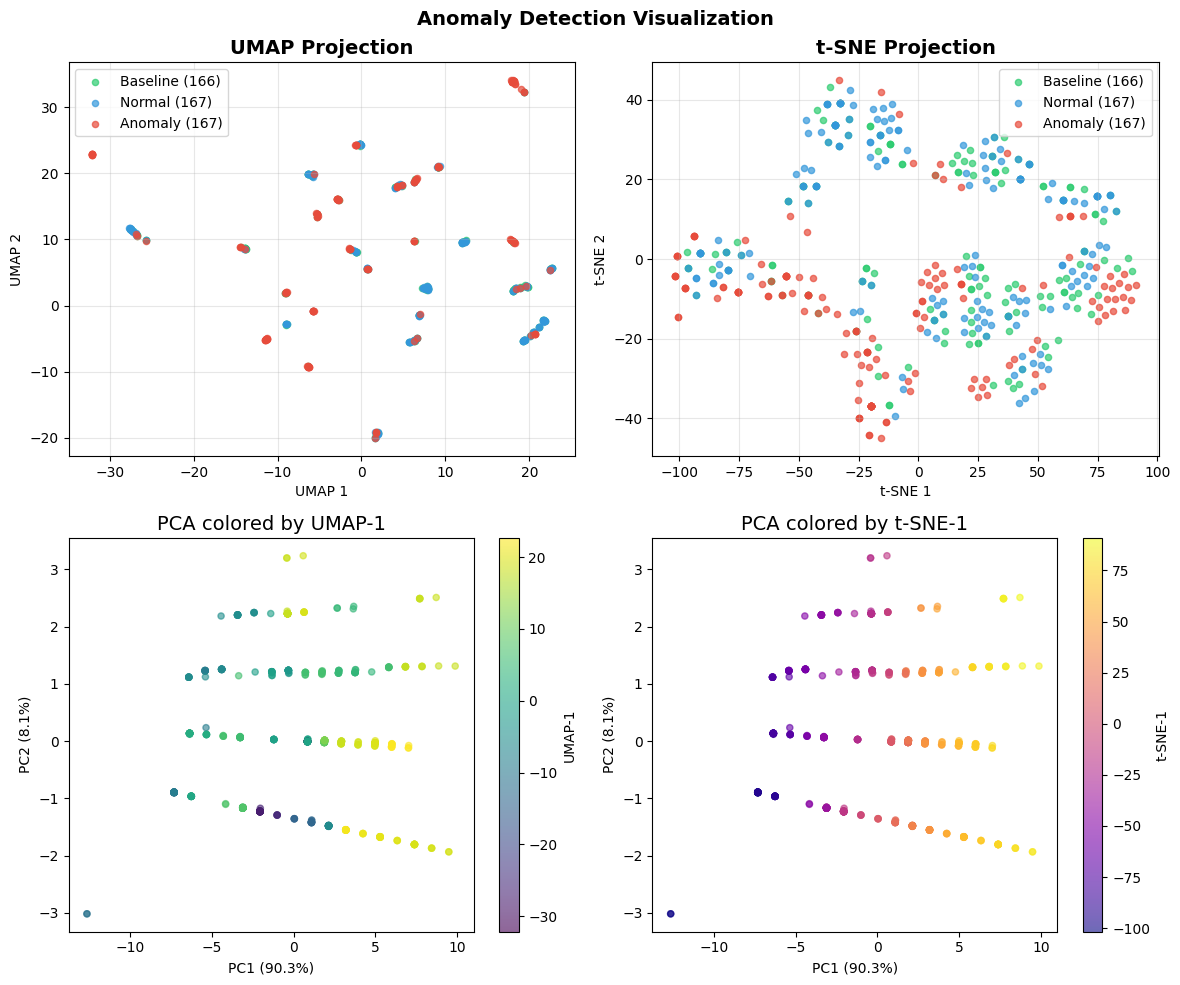


üìä VISUALIZATION SUMMARY:
----------------------------------------
Total points visualized: 500
Anomaly rate in sample: 33.4%

üìù Method Comparison:
   UMAP advantages shown: Global structure preservation
   t-SNE advantages shown: Local cluster detail

üîç CLUSTER ANALYSIS:
   üìä Found 17 clusters, 71 noise points
   üî∏ Cluster 0: 29 paths, 5 anomalies (17.2%)
   üî∏ Cluster 1: 14 paths, 14 anomalies (100.0%)
   üî∏ Cluster 2: 16 paths, 3 anomalies (18.8%)
   üî∏ Cluster 3: 27 paths, 26 anomalies (96.3%)
   üî∏ Cluster 4: 21 paths, 3 anomalies (14.3%)
   üî∏ Cluster 5: 13 paths, 13 anomalies (100.0%)
   üî∏ Cluster 6: 10 paths, 10 anomalies (100.0%)
   üî∏ Cluster 7: 10 paths, 10 anomalies (100.0%)
   üî∏ Cluster 8: 10 paths, 6 anomalies (60.0%)
   üî∏ Cluster 9: 13 paths, 6 anomalies (46.2%)
   üî∏ Cluster 10: 12 paths, 2 anomalies (16.7%)
   üî∏ Cluster 11: 10 paths, 10 anomalies (100.0%)
   üî∏ Cluster 12: 27 paths, 15 anomalies (55.6%)
   üî∏ Cluster 13: 10 

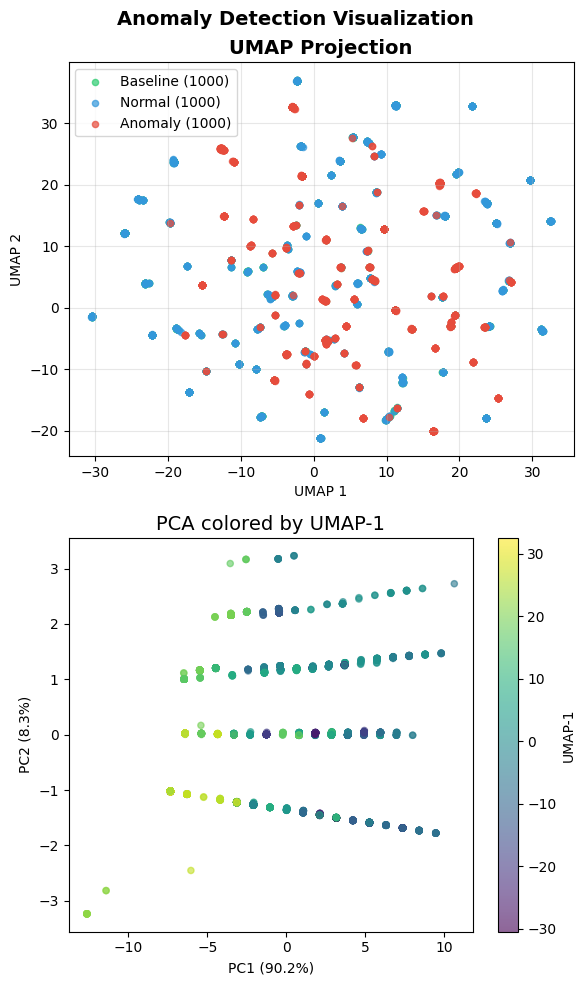


üìä VISUALIZATION SUMMARY:
----------------------------------------
Total points visualized: 3000
Anomaly rate in sample: 33.3%

üîç CLUSTER ANALYSIS:
   üìä Found 82 clusters, 88 noise points
   üî∏ Cluster 0: 38 paths, 38 anomalies (100.0%)
   üî∏ Cluster 1: 10 paths, 10 anomalies (100.0%)
   üî∏ Cluster 2: 17 paths, 17 anomalies (100.0%)
   üî∏ Cluster 3: 11 paths, 11 anomalies (100.0%)
   üî∏ Cluster 4: 25 paths, 8 anomalies (32.0%)
   üî∏ Cluster 5: 84 paths, 84 anomalies (100.0%)
   üî∏ Cluster 6: 10 paths, 2 anomalies (20.0%)
   üî∏ Cluster 7: 19 paths, 19 anomalies (100.0%)
   üî∏ Cluster 8: 43 paths, 43 anomalies (100.0%)
   üî∏ Cluster 9: 60 paths, 60 anomalies (100.0%)
   üî∏ Cluster 10: 50 paths, 50 anomalies (100.0%)
   üî∏ Cluster 11: 61 paths, 31 anomalies (50.8%)
   üî∏ Cluster 12: 39 paths, 39 anomalies (100.0%)
   üî∏ Cluster 13: 45 paths, 5 anomalies (11.1%)
   üî∏ Cluster 14: 17 paths, 17 anomalies (100.0%)
   üî∏ Cluster 15: 18 paths, 2 anomalie

In [8]:

from visualize_anomalies import create_anomaly_visualization, compare_all_methods
from cluster_analysis import run_full_cluster_analysis

# Use embeddings already computed by detector during training and detection
baseline_embeddings = detector.baseline_embeddings  # Already computed during train()

# Get analysis embeddings - these were computed during detect_anomalies()
# We need to access them or store them during detection
if hasattr(detector, 'analysis_embeddings'):
    analysis_embeddings = detector.analysis_embeddings
else:
    # Fallback: regenerate only if not stored
    print("‚ö†Ô∏è Analysis embeddings not stored, regenerating...")
    analysis_embeddings = detector.path_embedder.generate_embeddings_batch(analysis_traces)


# Use existing anomaly scores from analysis_results
anomaly_scores = analysis_results['graph_anomaly_score'].values

comparison_results = compare_all_methods(
    detector,
    baseline_embeddings,
    analysis_embeddings,
    anomaly_scores,
    analysis_results=analysis_results,
    sample_size=500
)

# Step 2: Create UMAP visualization with cluster extraction
print("üé® Creating UMAP visualization with cluster analysis...")
viz_results = create_anomaly_visualization(
    detector,
    baseline_embeddings, 
    analysis_embeddings,
    anomaly_scores,
    analysis_results=analysis_results,
    sample_size=3000,
    method='umap',
    random_state=42
)

# Step 3: Run comprehensive cluster analysis
if viz_results and viz_results['clusters']:
    print("\nüîç Running comprehensive cluster analysis...")
    
    cluster_analysis = run_full_cluster_analysis(
        viz_results['clusters'], 
        analysis_traces, 
        baseline_traces  # Use baseline_traces for comparison
    )

    print(f"Top problematic ASN: AS{cluster_analysis['summary']['summary']['top_asn']}")
    print(f"Top problematic route: {cluster_analysis['summary']['summary']['top_site_pair']}")
    
    # Store for further analysis
    cluster_paths = cluster_analysis['cluster_paths']
    provider_analysis = cluster_analysis['provider_analysis']

    provider_analysis = cluster_analysis['provider_analysis']
    print(f"REN/WLCG ASNs in anomalies: {len(provider_analysis['ren_asns'])}")
    print(f"Commodity ASNs in anomalies: {len(provider_analysis['commodity_asns'])}")

else:
    print("‚ö†Ô∏è No clusters found or UMAP not available")